### Multivariate Analysis:
    bi-variate analysis
    multivariate analysis
    > Should focus on target column during these analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,16.0,NaN,New Property,1342.0,NaN,NaN,0,0,0,0,0,1,79
1,flat,pivotal devaan,sector 84,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2,2,2,10.0,East,New Property,583.0,565.0,483.0,0,0,0,0,0,1,23
2,house,dlf city plots,sector 26,17.30,38734.0,4466.0,Plot area 502(419.74 sq.m.),6,7,3+,3.0,North,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,124
3,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,3.0,East,Relatively New,NaN,165.0,164.0,0,0,0,1,1,1,41
4,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,13.0,NaN,Undefined,NaN,2360.0,NaN,0,0,0,0,0,2,0


### property_type vs price

<Axes: xlabel='property_type', ylabel='price'>

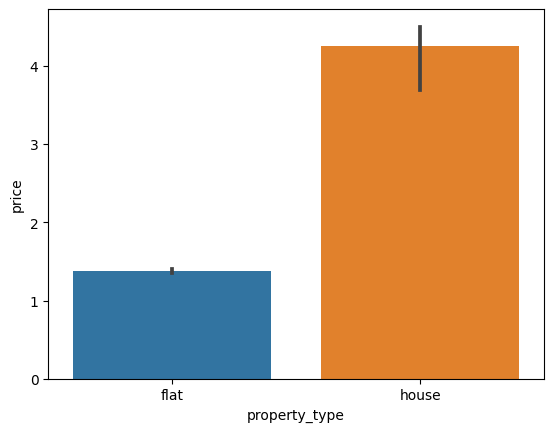

In [22]:
#sns.barplot(x=df['property_type'], y=df['price'], estimator=np.mean)
sns.barplot(x=df['property_type'], y=df['price'], estimator=lambda x: np.nanmedian(x))

# Obs: houses are more expensive than flats


<Axes: xlabel='property_type', ylabel='price'>

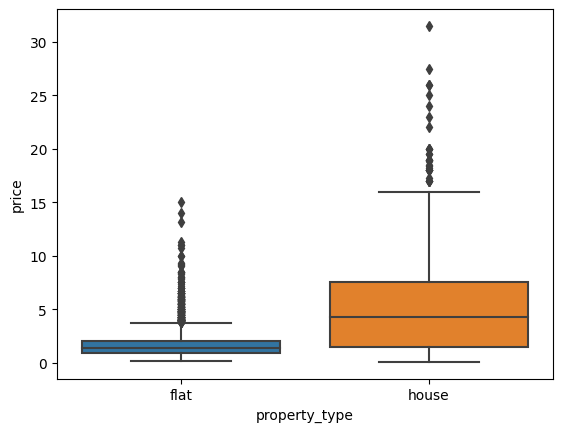

In [10]:
sns.boxplot(x=df['property_type'], y=df['price'])
# Range of houses is higher than flats

### property_type vs area

<Axes: xlabel='property_type', ylabel='built_up_area'>

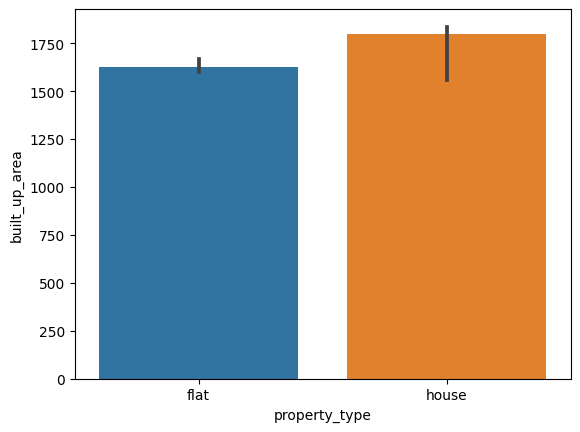

In [21]:
#sns.barplot(x=df['property_type'], y=df['built_up_area'], estimator=np.median)
sns.barplot(x=df['property_type'], y=df['built_up_area'], estimator=lambda x: np.nanmedian(x))

# houses should have more area than flats (expected result)

<Axes: xlabel='property_type', ylabel='built_up_area'>

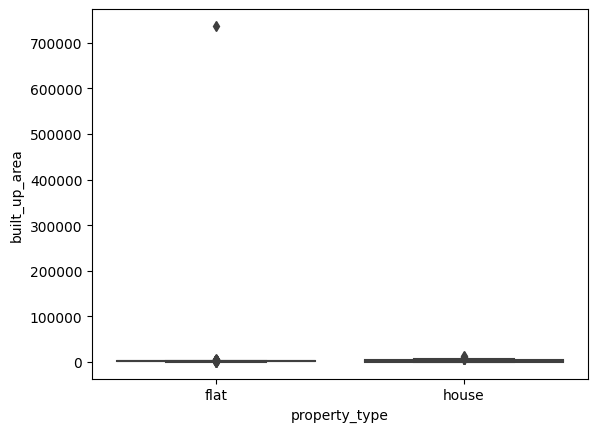

In [14]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

In [15]:
# removing that outlier
df = df[df['built_up_area'] != 737147]


<Axes: xlabel='property_type', ylabel='built_up_area'>

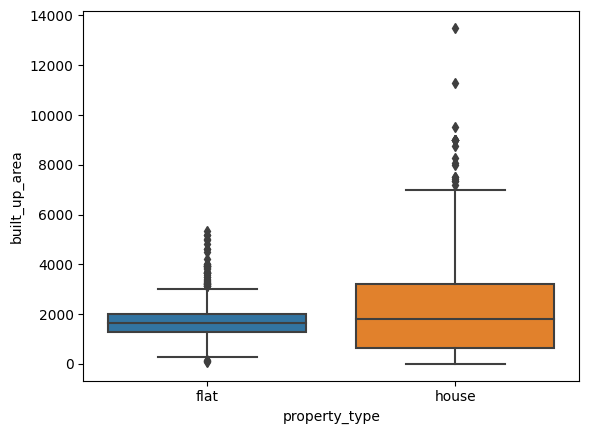

In [16]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])


### property_type vs price_per_sqft

In [18]:
df['price_per_sqft'].isnull().sum()

17

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

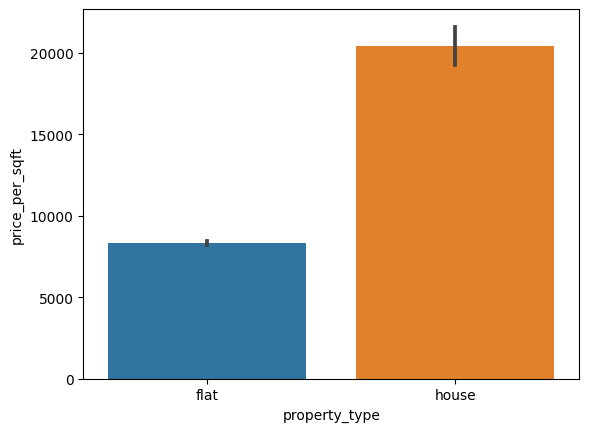

In [24]:
#sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator=np.median)
sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator=lambda x: np.nanmedian(x))
# Little expensive for houses

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

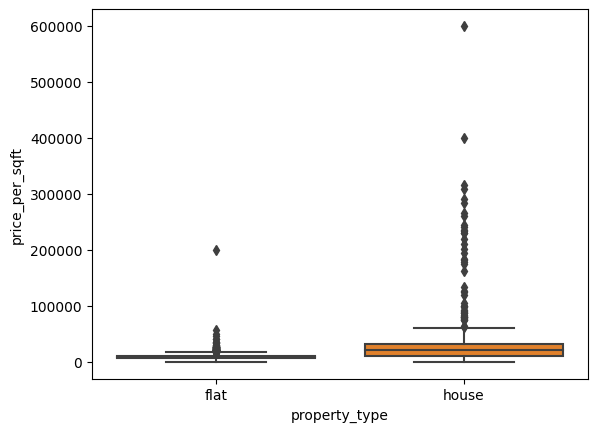

In [23]:
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])


In [26]:
# check outliers
df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]

# Units conversion for area might be wrong -> Not an outlier but a data error

,property_type,society,sector,price,price_per_sqft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
47,house,independent,sector 38,8.00,230547.0,347.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,NaN,347.0,215.0
119,house,unitech uniworld resorts,sector 33,10.00,181818.0,550.0,Plot area 550(51.1 sq.m.),NaN,550.0,NaN
279,house,ansal,sector 43,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),NaN,60.0,NaN
310,house,independent,sector 28,4.50,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),NaN,360.0,NaN
344,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,NaN,NaN,1600.0
485,house,independent,sector 12,3.50,133079.0,263.0,Plot area 263(24.43 sq.m.)Built Up area: 4800 ...,NaN,4800.0,4400.0
534,house,independent,sector 17,3.50,218750.0,160.0,Built Up area: 160 (14.86 sq.m.),NaN,160.0,NaN
581,house,independent,sector 55,1.45,241666.0,60.0,Plot area 60(5.57 sq.m.),NaN,60.0,NaN
710,house,dlf city plots phase 2,sector 25,10.50,261194.0,402.0,Plot area 402(37.35 sq.m.),NaN,402.0,NaN
755,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),NaN,400.0,NaN


<Axes: xlabel='bedRoom', ylabel='property_type'>

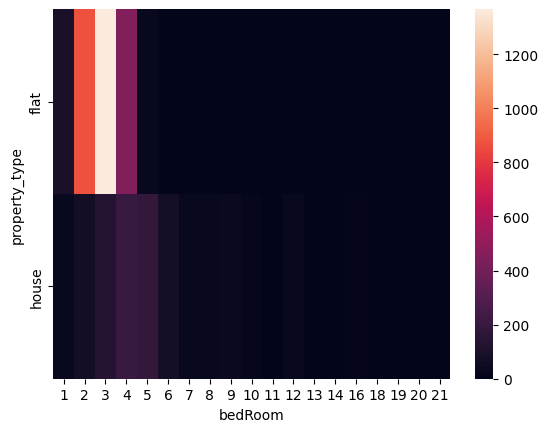

In [27]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))
# flats have common 2,3,4 bedrooms

In [29]:
# checking outliers
df[df['bedRoom'] >= 10] # some data errors like 10 bedrroms and just 347 sqft area

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
16,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,0,72
47,house,independent,sector 38,8.00,230547.0,347.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,10,10,3+,1.0,North,Undefined,NaN,347.0,215.0,0,0,0,0,0,2,0
164,house,shivpuri,sector 7,2.40,8889.0,2700.0,Plot area 300(250.84 sq.m.),10,5,3,2.0,North,Old Property,NaN,2700.0,NaN,1,1,0,1,0,2,8
246,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,0,22
312,house,independent,sector 13,1.50,11538.0,1300.0,Plot area 1300(120.77 sq.m.),10,7,3,4.0,East,Moderately Old,NaN,1300.0,NaN,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3527,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,2,74
3535,house,independent,sector 13,0.50,90909.0,55.0,Plot area 55(5.11 sq.m.),12,4,3,4.0,NaN,Old Property,NaN,55.0,NaN,0,0,0,0,0,2,15
3579,house,dlf pink town house,sector 24,1.90,3786.0,5018.0,Built Up area: 5018 (466.19 sq.m.),10,9,3+,3.0,North,Relatively New,NaN,5018.0,NaN,0,0,0,0,1,0,29
3608,house,independent,sector 11,1.35,3857.0,3500.0,Plot area 3500(325.16 sq.m.),10,6,3+,3.0,NaN,Old Property,NaN,3500.0,NaN,0,0,0,0,0,2,0


<Axes: xlabel='property_type', ylabel='floorNum'>

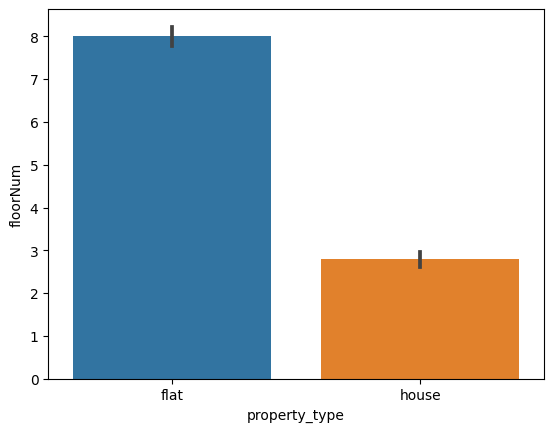

In [30]:
sns.barplot(x=df['property_type'],y=df['floorNum'])
# flats are mostly on higher floors

<Axes: xlabel='property_type', ylabel='floorNum'>

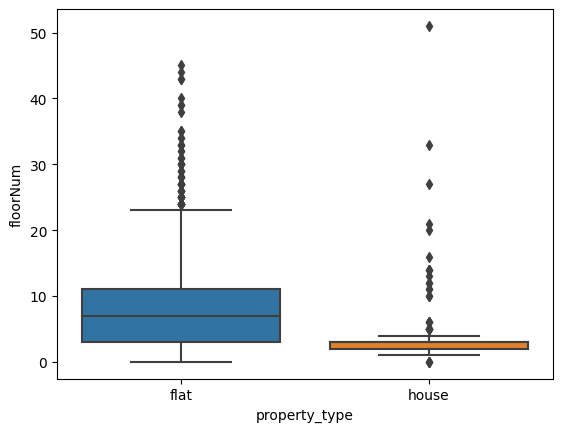

In [31]:
sns.boxplot(x=df['property_type'],y=df['floorNum'])
# Penthouses can be a the top floor, so some houses are on higher floors

In [32]:
# checking for outliers
df[(df['property_type'] == 'house') & (df['floorNum'] > 10)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
4,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,13.0,NaN,Undefined,NaN,2360.0,NaN,0,0,0,0,0,2,0
41,house,ats tourmaline,sector 109,1.87,8697.0,2150.0,Built Up area: 2150 (199.74 sq.m.),3,4,0,12.0,NaN,Undefined,NaN,2150.0,NaN,0,0,0,0,0,2,0
112,house,ninex city,sector 76,1.75,6250.0,2800.0,Carpet area: 2800 (260.13 sq.m.),4,4,0,14.0,NaN,Undefined,NaN,NaN,2800.0,0,0,0,0,0,2,0
555,house,dlf the arbour,sector 63,8.50,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,NaN,3950.0,NaN,0,0,0,0,0,2,61
570,house,suncity avenue 76,sector 76,0.75,10067.0,745.0,Plot area 745(69.21 sq.m.)Built Up area: 745 s...,2,2,2,11.0,North-East,New Property,NaN,745.0,NaN,0,0,0,0,0,2,40
711,house,greenopolis,sector 89,0.70,5397.0,1297.0,Built Up area: 1297 (120.5 sq.m.),2,2,2,14.0,North-East,Undefined,NaN,1297.0,NaN,0,0,0,0,0,2,0
1038,house,indiabulls centrum park,sector 103,3.25,8125.0,4000.0,Plot area 4000(371.61 sq.m.),4,3,3+,20.0,NaN,Under Construction,NaN,4000.0,NaN,0,0,0,0,0,2,51
1267,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5,5,3+,21.0,NaN,Relatively New,NaN,3653.0,NaN,0,0,0,0,0,2,0
1837,house,satya the hermitage,sector 103,3.15,6702.0,4700.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,12.0,East,Undefined,NaN,4700.0,NaN,0,0,0,0,0,2,61
1839,house,vatika the seven lamps,sector 82,1.60,6597.0,2425.0,Plot area 2425(225.29 sq.m.),4,4,3+,16.0,North,Moderately Old,NaN,2425.0,NaN,0,1,0,0,0,2,94


<Axes: xlabel='agePossession', ylabel='property_type'>

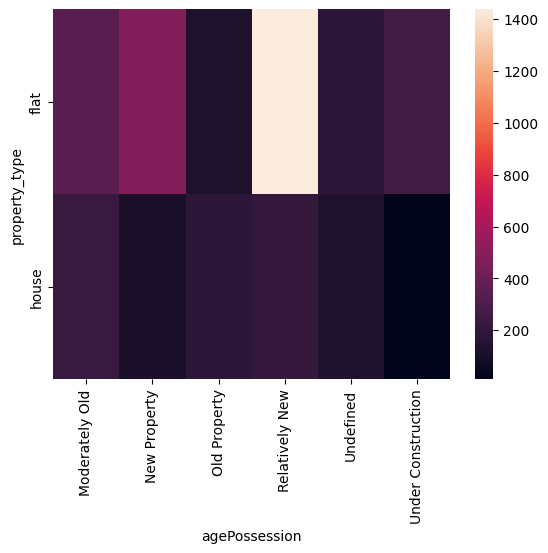

In [33]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))
# flats are mostly new

<Axes: xlabel='agePossession', ylabel='property_type'>

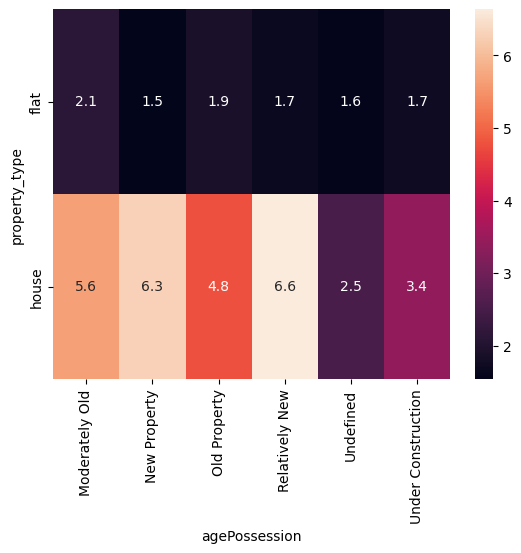

In [34]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='agePossession',values='price',aggfunc='mean'),annot=True)
# On an average, house price is pretty higher. whereas as flats are mostly budgeted

<Axes: xlabel='bedRoom', ylabel='property_type'>

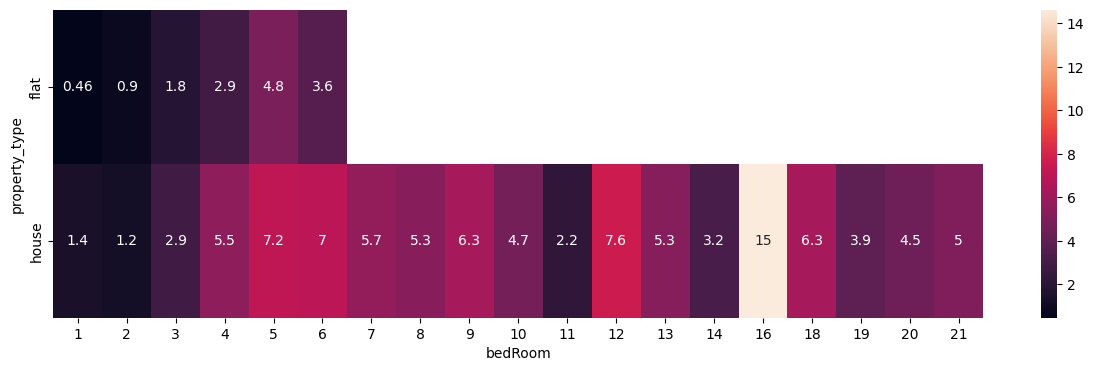

In [36]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)
# increse in bedrooms results in increase in price while some exceptions are there (may be data errors)

<Axes: xlabel='furnishing_type', ylabel='property_type'>

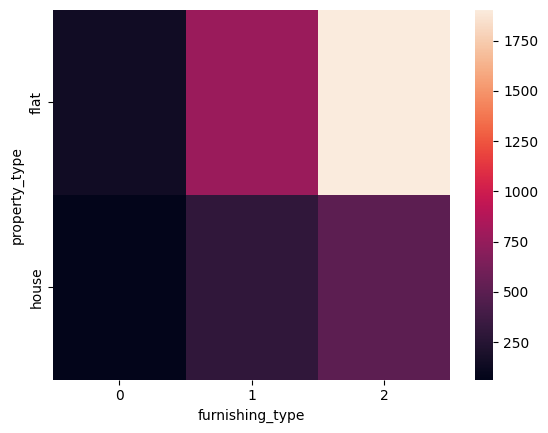

In [37]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))
# most flats are unfurnisheid

<Axes: xlabel='furnishing_type', ylabel='property_type'>

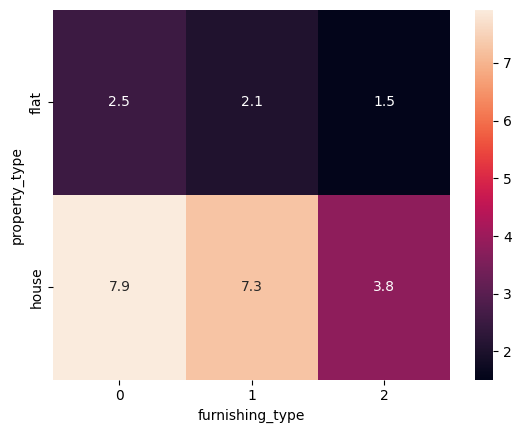

In [38]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)
# unfurnished -> semi furnished -> furnished (price wise)

<Axes: xlabel='property_type', ylabel='luxury_score'>

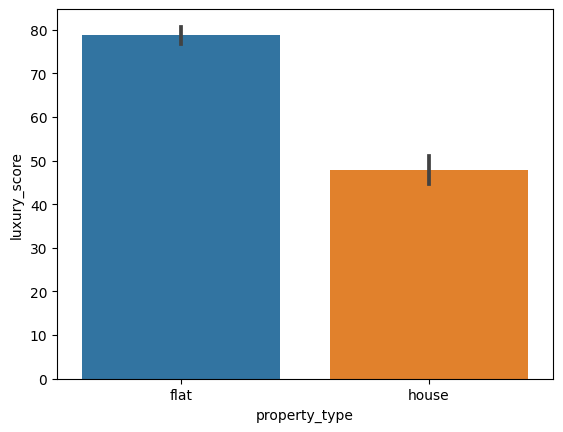

In [40]:
sns.barplot(x=df['property_type'],y=df['luxury_score'])
# amenitits are mostly found in flats

<Axes: xlabel='property_type', ylabel='luxury_score'>

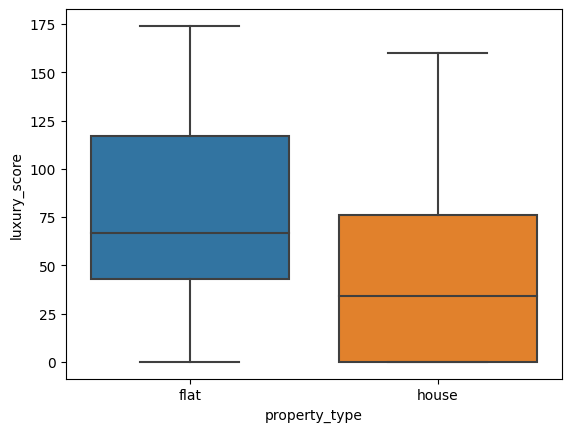

In [41]:
sns.boxplot(x=df['property_type'],y=df['luxury_score'])


<Axes: xlabel='sector', ylabel='property_type'>

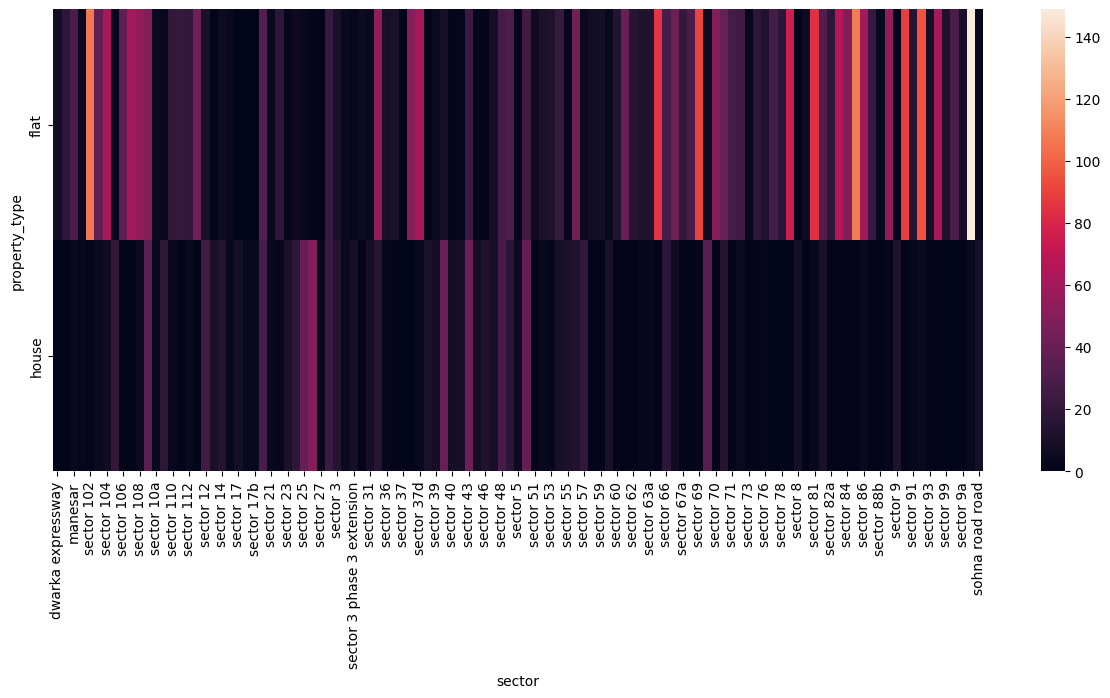

In [42]:
# sector analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['property_type'],df['sector'].sort_index()))
# 70 onwards sectors have more number of flats, while older sectors(1-60) have more number of houses


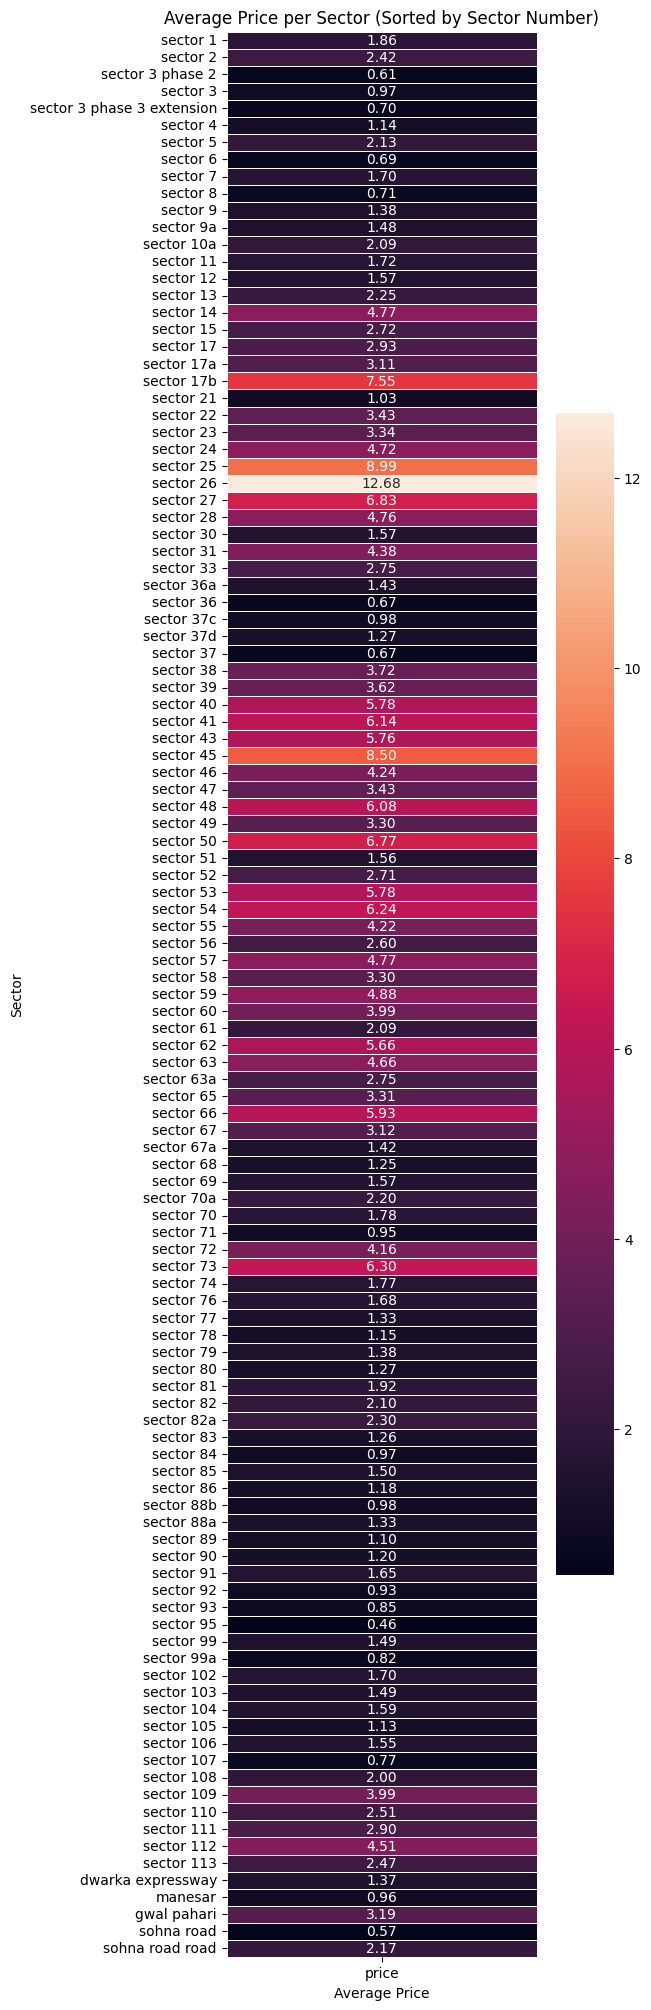

In [45]:
# sector analysis
import re
# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

# new sectors have comparatively lesser price 

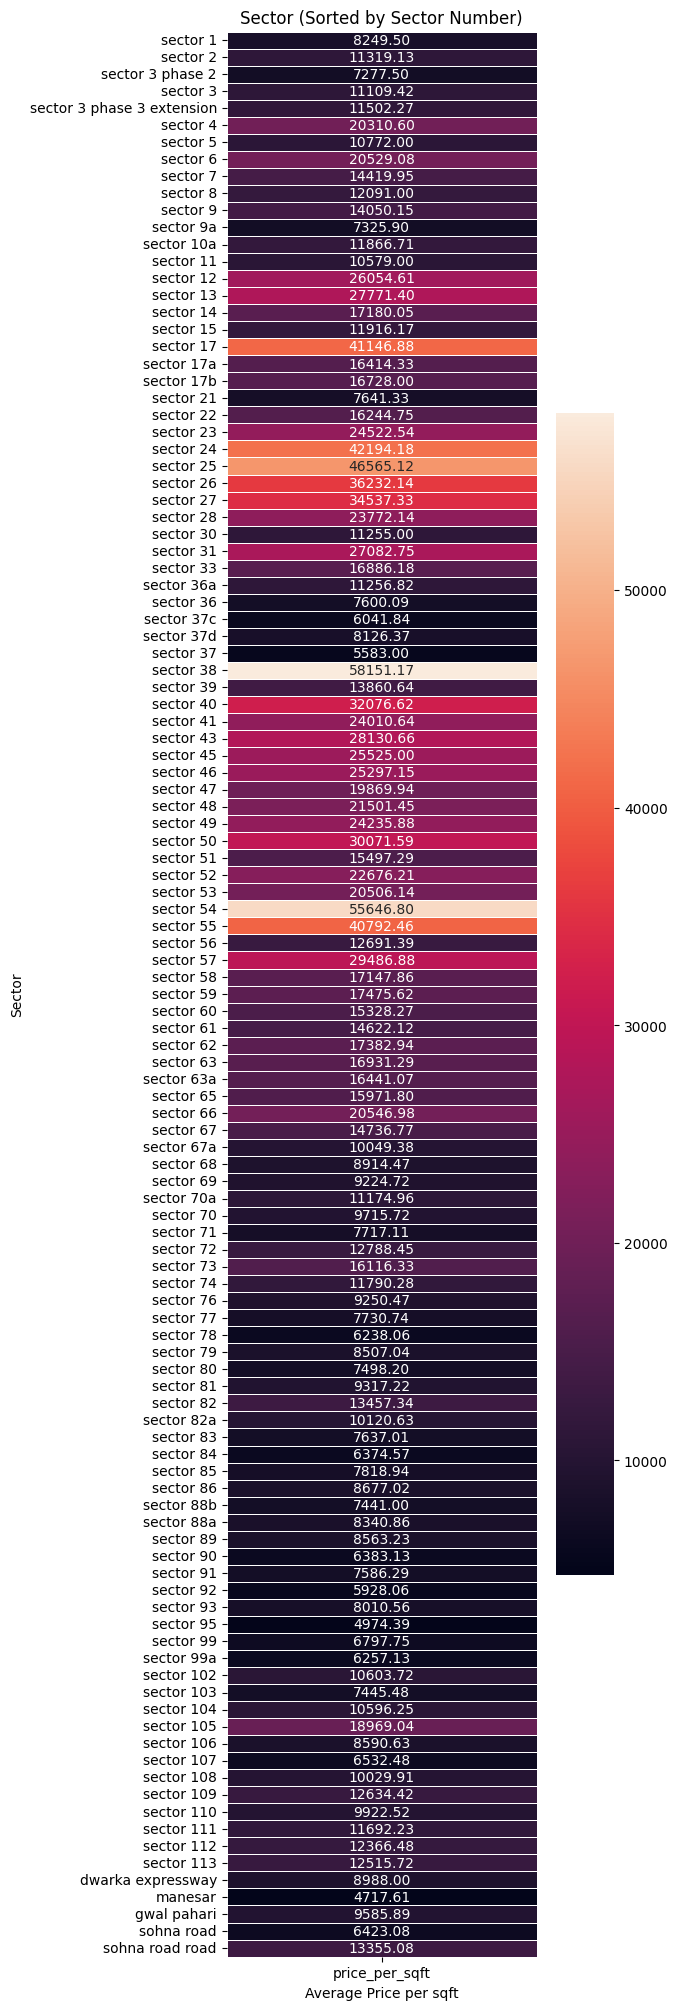

In [46]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()
# price per sqft is also less in new sectors and cneter sectors have higher price per sqft

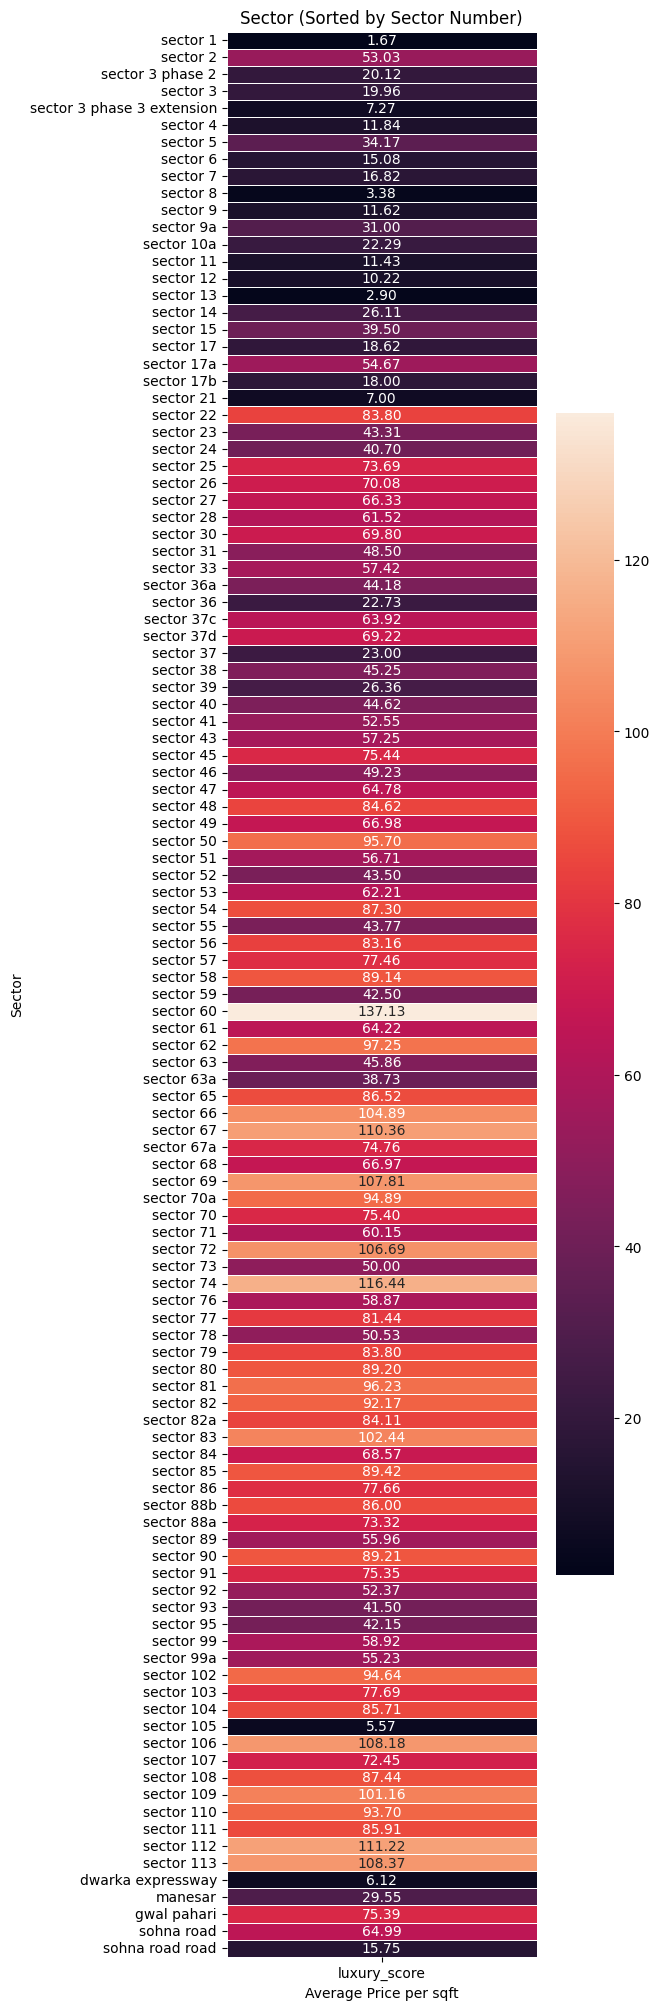

In [47]:
# Group by 'sector' and calculate the average luxury score
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

# As we move from older sectors to newer sectors the luxury score increases. This means that newer sectors have more luxurious properties.(more amenities)

## Price

<Axes: xlabel='area', ylabel='price'>

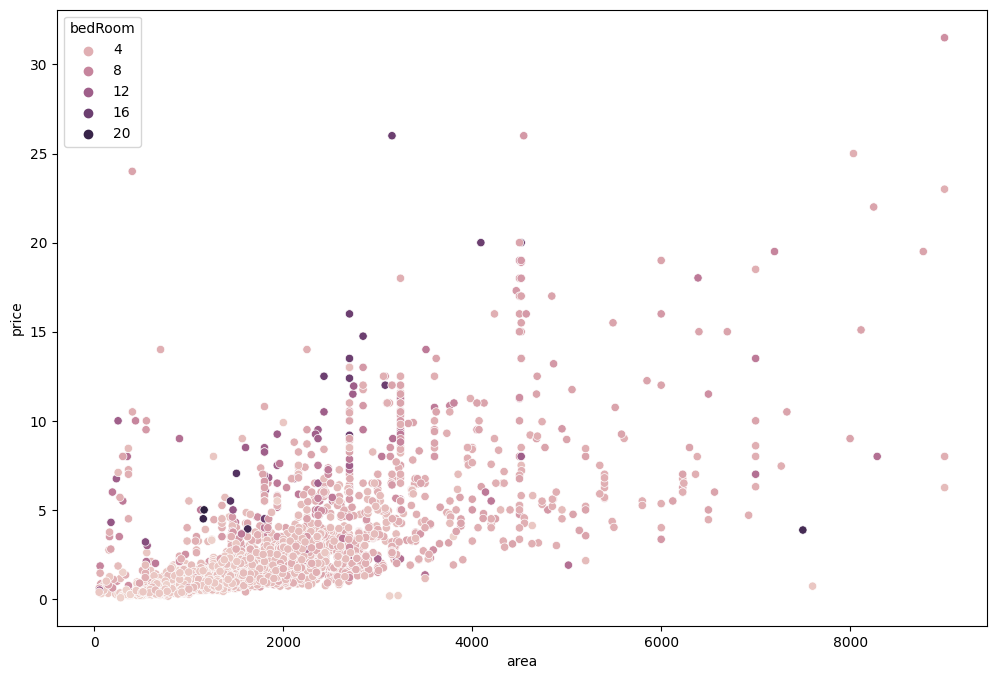

In [49]:
# Price with area and number of bedrooms
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df[df['area'] < 10000], x='area', y='price', hue='bedRoom')

<Axes: xlabel='area', ylabel='price'>

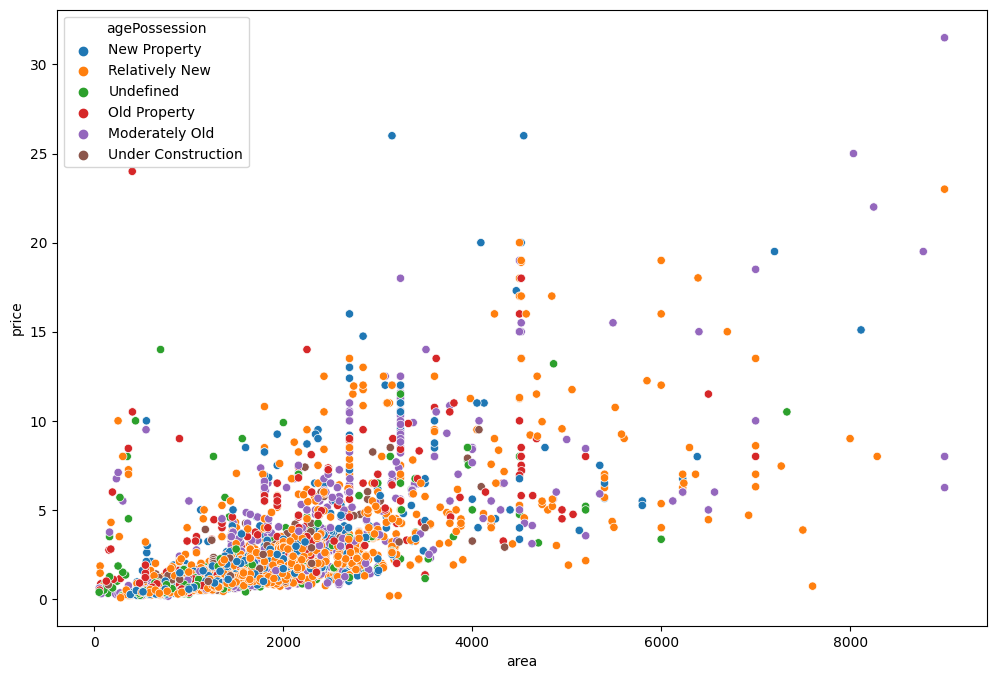

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df[df['area'] < 10000], x='area', y='price', hue='agePossession')
# nothing much to infer

<Axes: xlabel='area', ylabel='price'>

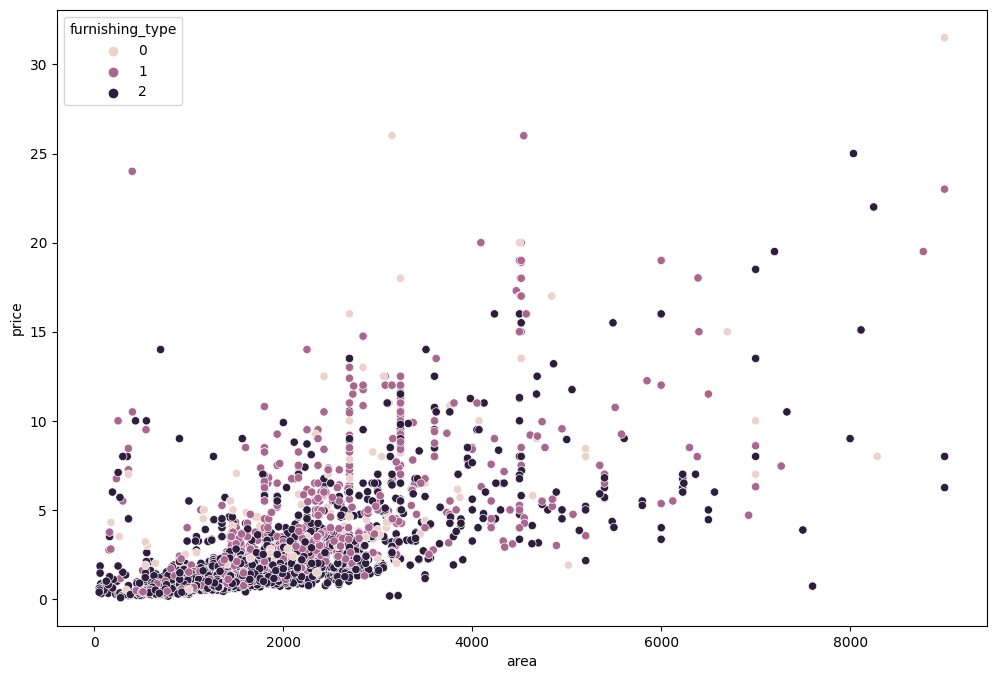

In [52]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df[df['area'] < 10000], x='area', y='price', hue='furnishing_type')

c:\Users\User\anaconda3\envs\Research_env\lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


<Axes: xlabel='bedRoom', ylabel='price'>

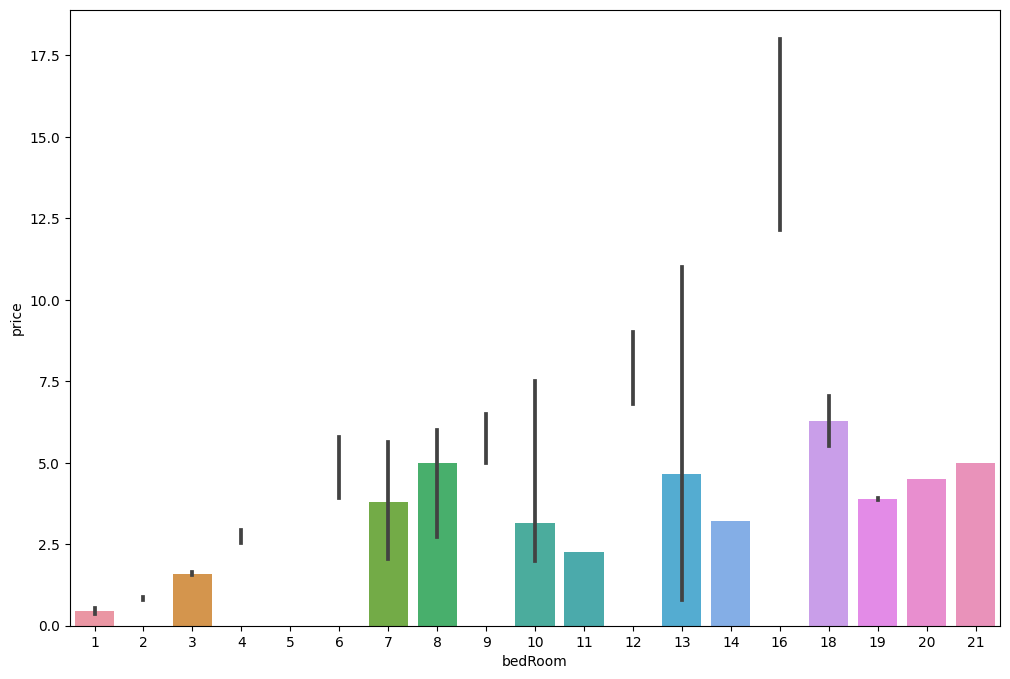

In [54]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.median)

0
17


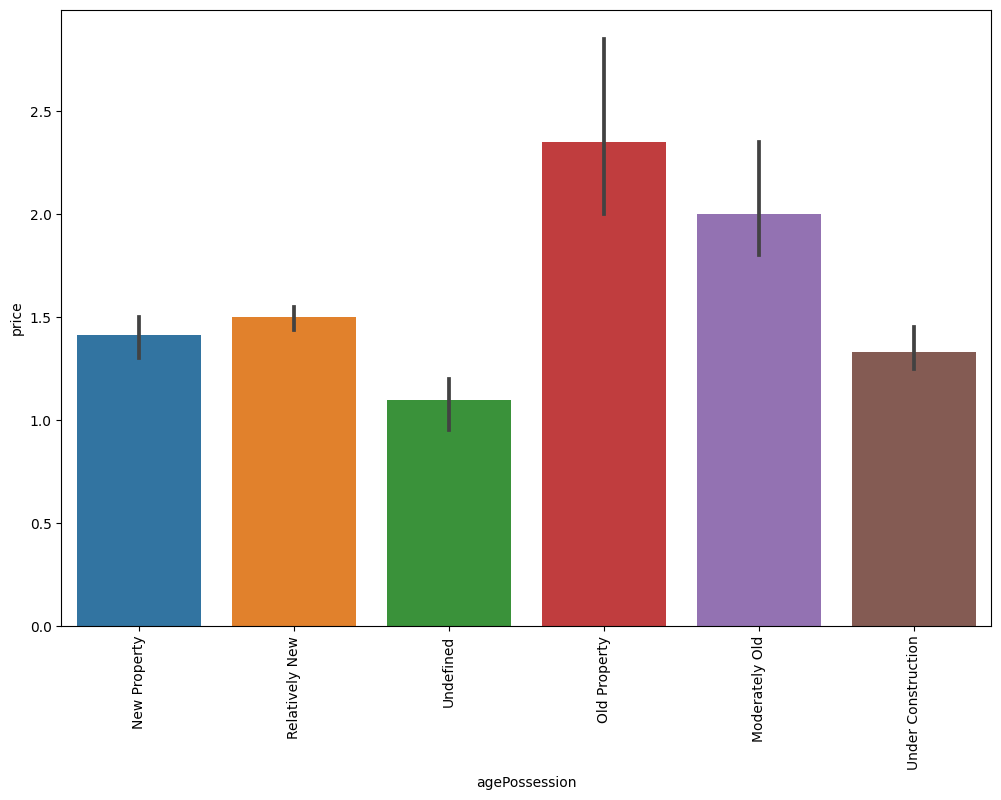

In [57]:
print(df['agePossession'].isnull().sum())
print(df['price'].isnull().sum())
df = df.dropna(subset=['agePossession', 'price'])


plt.figure(figsize=(12, 8))
sns.barplot(x=df['agePossession'], y=df['price'], estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()
# Somehow old properties are more expensive-> little surprising

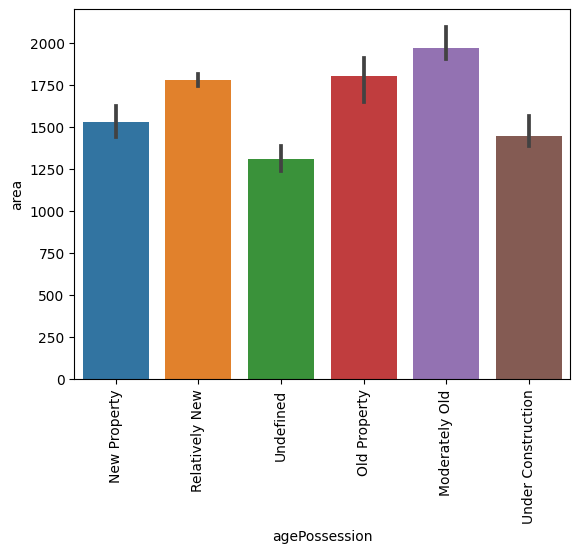

In [58]:
sns.barplot(x=df['agePossession'],y=df['area'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='furnishing_type', ylabel='price'>

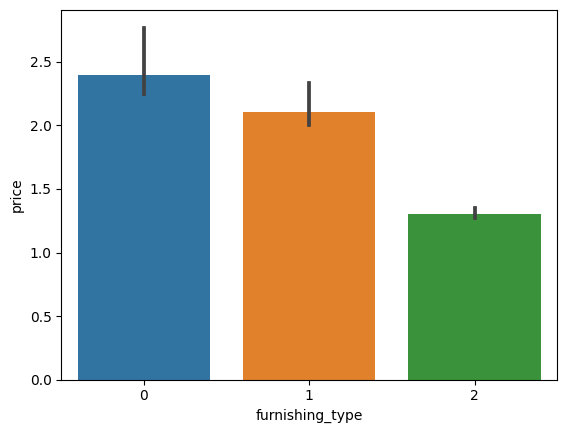

In [59]:
sns.barplot(x=df['furnishing_type'],y=df['price'],estimator=np.median)


### Correlation

In [62]:
# plt.figure(figsize=(8,8))
# sns.heatmap(df.corr())

In [64]:
#df.corr()['price'].sort_values(ascending=False)


In [65]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,16.0,NaN,New Property,1342.0,NaN,NaN,0,0,0,0,0,1,79
1,flat,pivotal devaan,sector 84,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2,2,2,10.0,East,New Property,583.0,565.0,483.0,0,0,0,0,0,1,23
2,house,dlf city plots,sector 26,17.30,38734.0,4466.0,Plot area 502(419.74 sq.m.),6,7,3+,3.0,North,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,124
3,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,3.0,East,Relatively New,NaN,165.0,164.0,0,0,0,1,1,1,41
4,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,13.0,NaN,Undefined,NaN,2360.0,NaN,0,0,0,0,0,2,0
